> 📃 [https://arxiv.org/abs/2106.09685](https://arxiv.org/abs/2106.09685)

Authors

> Edward J. Hu, Yelong Shen, Phillip Wallis, Zeyuan Allen-Zhu, Yuanzhi Li, Shean Wang, Lu Wang, Weizhu Chen



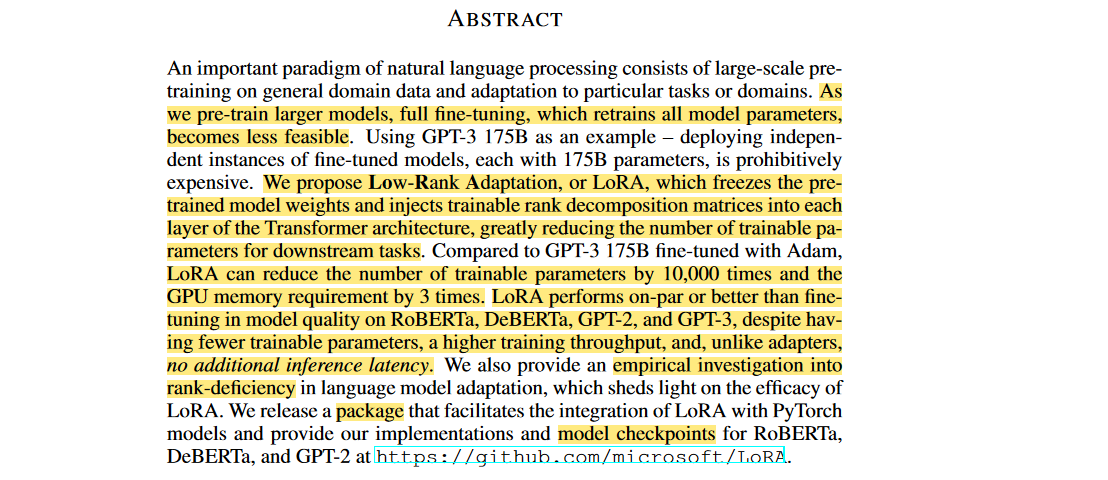

- Full fine tuning - retraining all parameters is expensive and impractical for large models.
- LoRA is a fine tuning technique which:
    - does not mutate existing weights
    - does not add inference latency to original model (unlike Adapter techniques)
    - $\Rightarrow$ performs $\geq$ full fine tuning
    - $\Rightarrow$ deploy multiple finetuned versions of a model with little hardware costs
- Empirical study
- LoRA PyTorch package and model checkpoints from their study.

### Goal

Given a pre-trained model, we want to create a variation of that model which is:

- performant on a specific downstream task
- has been trained on a new dataset, unseen by the pre-trained model

### Full Fine Tuning

![](fft.png)

Train a variant of the model by updating all the parameters  
$\Rightarrow$ expensive to train  
$\Rightarrow$ for large models:

- a single deployment is a challenge
- deploying multiple fully fine tuned versions for each downstream task is impractical

### Prevailing alternative methods before LoRA

#### Adapter methods
> 📃 [Parameter-Efficient Transfer Learning for NLP by Houlsby et al.](https://arxiv.org/abs/1902.00751)

![Adapter layer architecture, and integration with Transformer](adapter.png)



- add adapters or  "bottleneck layers" to targeted parameters you wish to fine tune
- original parameters are frozen

$\Rightarrow$ results in a fine tuned model trained with fewer learned parameters  than full fine tuning  
$\Rightarrow$ extends the size of the network, leading to higher interence times

![](adapter-review.png)

![](versus-adapter.png)

#### Optimizing input

> 📃 [Prefix-Tuning: Optimizing Continuous Prompts for Generation](http://arxiv.org/abs/2101.00190)  

- Train an input vector prefix suited to the task  
  $\Rightarrow$ consumes input context length

![](input-optimisation.png)

#### Conclusion

$\Rightarrow$ Trading off lower training costs for model quality  
$\Rightarrow$ These methods often fail to match the fine-tuning baseline

### Inspiration: "Intrinsic Dimension"

- When we train deep learning networks, our architecture determines the number of parameters $|\Theta| = P$.
- But once trained, often the networks are over-parameterized  
  $\Rightarrow$ the power of the learned models can be expressed with fewer parameters $D < P$.  

> 📃 [Measuring the Intrinsic Dimension of Objective Landscapes by Li et al. (2018)](https://arxiv.org/abs/1804.08838)  

- Start with a prior model architecture with $|\Theta| = P$ parameters.
- Reimplement the model architecture by initialising the P parameters randomly and then freezing P - D of them.
- Train the model using only the free D parameters.
- Repeat the experiment until the performance reaches 90% of the original model $\Rightarrow$ **Intrinsic Dimension**.

---

![Figure: Intrinsic dimensions of MNIST models](mnist_intrinsic_dimension.png)
---

> 📃 [Intrinsic Dimensionality Explains the Effectiveness of Language Model Fine-Tuning by Aghajanyan et al. (2020)](https://arxiv.org/abs/2012.13255)


![](low-rank.png)

### Hypothesis

![](hypothesis2.png)

When fine tuning a weight  $W$ to get our fine-tuned weight $W^{\prime}$  $$W^\prime = W + \Delta W$$ the intrinsic rank of $\Delta W$ is small.


### Weight Freezing

Consider a linear layer
$$ y = W \cdot x + b$$
and suppose we want to fine tune $W$.

We can freeze $W=W_0$ and $b=b_0$, then learn a new tensor $Z$ which has the same dimension as $W$ :
$$
y =  (W_0+ Z) \cdot  x + b_0  \tag{$\star$}
$$
where $Z = \Delta W$, "the accumulated gradient update".

Backpropagation should be able to express the same updates through Z as it would if we were updating W directly.

Then for inference with our fine-tuned model, we can simply swap out $W$ for $W^{^{\prime}} = W + Z$.



### Matrix products and Rank

Rank $\approx$ number of rows in a matrix

Suppose $Z$ is an $m \times n$ matrix. Then any matrices $A$ and $B$ satisfying

$$Z = B \cdot A$$

will be of size $m \times r$ and $r \times n$ respectively for some $r$.

Regardless of the value of $r$, we will always get back an $m \times n$ matrix.

Factorizing $Z$ into matrices $A$ and $B$ and choosing small $r$ results in fewer parameters to learn.

> Example  
> If $m=20$, $n=10$ then $Z$ has $|Z| = m \cdot n = 200$ parameters.  
> If $k=r$, then $|A| = 20 \cdot 2 = 40$ and $|B| = 2 \cdot 10 = 20$ then by factorizing $W$ into $A$ and $B$ we only need to learn $60$ parameters versus 200.  

### Low Rank Updates

Implementing Matrix decomposition in $(\star)$

$$
y = (W_0+ B\cdot A) \cdot x + b_0
$$

$\Rightarrow$ The rank $r \leq \min(m,n)$ of matrix $A$ becomes a hyper parameter in our LoRA model.  
$\Rightarrow$ Lower rank means less learnable parameters  
$\Rightarrow$ LoRa  


Applying the updates to all parameters is equivalent to full fine tuning.


![](dettmers.png)

### Advantages

![](advantages.png)

![](advantages3.png)

![](advantages2.png)

### Limitations

![](limitations.png)

### Application to Transformers

![](transformers.png)

## Results

### Inference Latency

![](adapter-inference.png)

### Benchmark scores

![](bench-bert.png)

![](bench-gpt.png)

### Scaling up: GPT-3 175b

![](gpt3-175b.png)

### Which weights should we pick?

![](weights.png)